In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


*Statement*
- *Cases*: This dataset is valuable for environmental researchers, data scientists, policymakers, and anyone interested in studying carbon emissions patterns, analyzing climate change impact, or modelling future scenarios of CO₂ emissions. It supports a wide range of analyses, from simple visualizations to complex statistical modelling.
- *Region: The geographical or administrative region to which each country belongs. This categorization facilitates regional analysis by grouping countries into broader areas, such as continents or economic zones.*
- *Country: The name of the country for which CO₂ emissions data is recorded. This column allows for country-specific analysis and comparison.*
- *Date: The year in which the CO₂ emissions data was recorded, formatted as a date for compatibility with time-series analysis and to allow temporal trends to be identified.
- *Metric Tons Per Capita: The per capita emissions of CO₂ for each country, expressed in metric tons. This value represents the average carbon dioxide emissions per person, offering insight into individual emissions contributions relative to population size.*
- *Kilotons of CO₂: The total amount of carbon dioxide emissions, measured in kilotons, released by each country in the specified year. This column provides a quantitative measure of national CO₂ emissions.*

In [23]:
data=pd.read_csv('/content/Carbon_(CO2)_Emissions_by_Country.csv')
df=pd.DataFrame(data)
df

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17
...,...,...,...,...,...
5672,Zimbabwe,Africa,01-01-2004,9770.0,0.80
5673,Zimbabwe,Africa,01-01-2007,9760.0,0.78
5674,Zimbabwe,Africa,01-01-2010,9600.0,0.75
5675,Zimbabwe,Africa,01-01-2009,7750.0,0.61


In [24]:
df.info() #DataFrame Details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 5677 non-null   object 
 1   Region                  5677 non-null   object 
 2   Date                    5677 non-null   object 
 3   Kilotons of Co2         5677 non-null   float64
 4   Metric Tons Per Capita  5677 non-null   float64
dtypes: float64(2), object(3)
memory usage: 221.9+ KB


In [25]:
df.isnull().sum()
#find total sum of null values

,0
Country,0
Region,0
Date,0
Kilotons of Co2,0
Metric Tons Per Capita,0


In [26]:
df.duplicated().sum()#finding total nums of duplicates

np.int64(0)

#*Visualization*

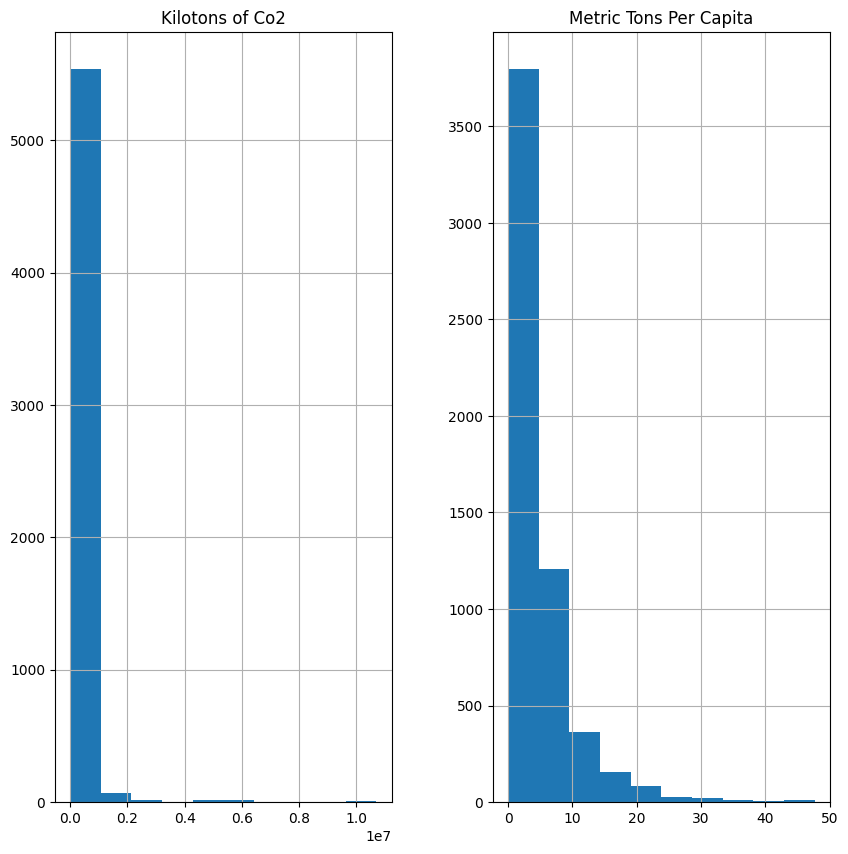

In [27]:
df.hist(figsize=(10,10))
plt.show()

<Axes: ylabel='Density'>

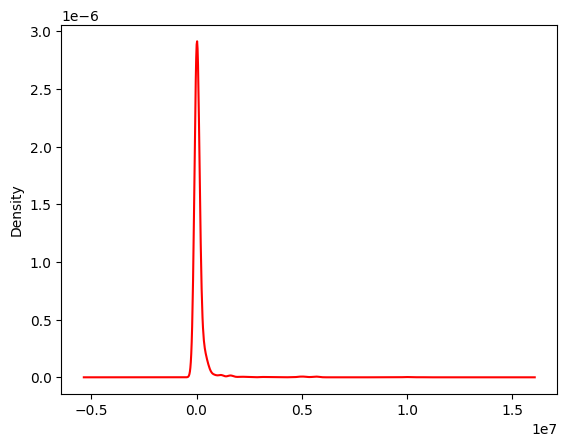

In [28]:
df['Kilotons of Co2'].plot(kind='kde',color='r')#ploting graph

<Axes: ylabel='Density'>

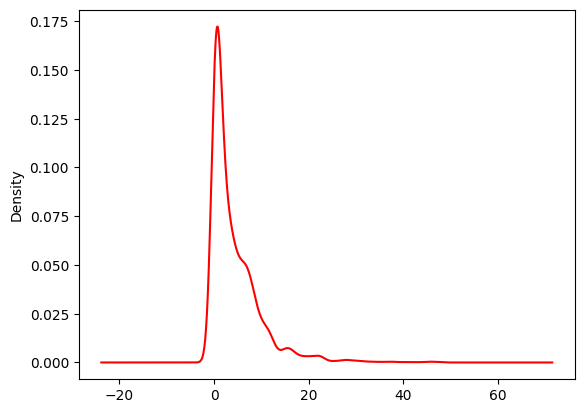

In [29]:
df['Metric Tons Per Capita'].plot(kind='kde',color='r')#ploting graph

In [30]:
df['Region'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [31]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic Of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'I

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
df['Country']=le.fit_transform(df['Country'])
df['Region']=le.fit_transform(df['Region'])

df['Metric Tons Per Capita']=le.fit_transform(df['Metric Tons Per Capita'])

In [34]:
df

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,0,2,01-01-2011,8930.0,30
1,0,2,01-01-2012,8080.0,26
2,0,2,01-01-2010,7110.0,24
3,0,2,01-01-2019,6080.0,15
4,0,2,01-01-2018,6070.0,16
...,...,...,...,...,...
5672,189,0,01-01-2004,9770.0,79
5673,189,0,01-01-2007,9760.0,77
5674,189,0,01-01-2010,9600.0,74
5675,189,0,01-01-2009,7750.0,60


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 5677 non-null   int64  
 1   Region                  5677 non-null   int64  
 2   Date                    5677 non-null   object 
 3   Kilotons of Co2         5677 non-null   float64
 4   Metric Tons Per Capita  5677 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 221.9+ KB


In [36]:
df['Date']=pd.to_datetime(df['Date'])


In [37]:
c=df.corr()  #it used to find correlation between each pair of numerical variables
c

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
Country,1.000000,0.084759,0.003295,0.028824,0.008189
Region,0.084759,1.000000,0.002415,0.049393,0.450099
Date,0.003295,0.002415,1.000000,0.037744,0.012496
Kilotons of Co2,0.028824,0.049393,0.037744,1.000000,0.225092
Metric Tons Per Capita,0.008189,0.450099,0.012496,0.225092,1.000000


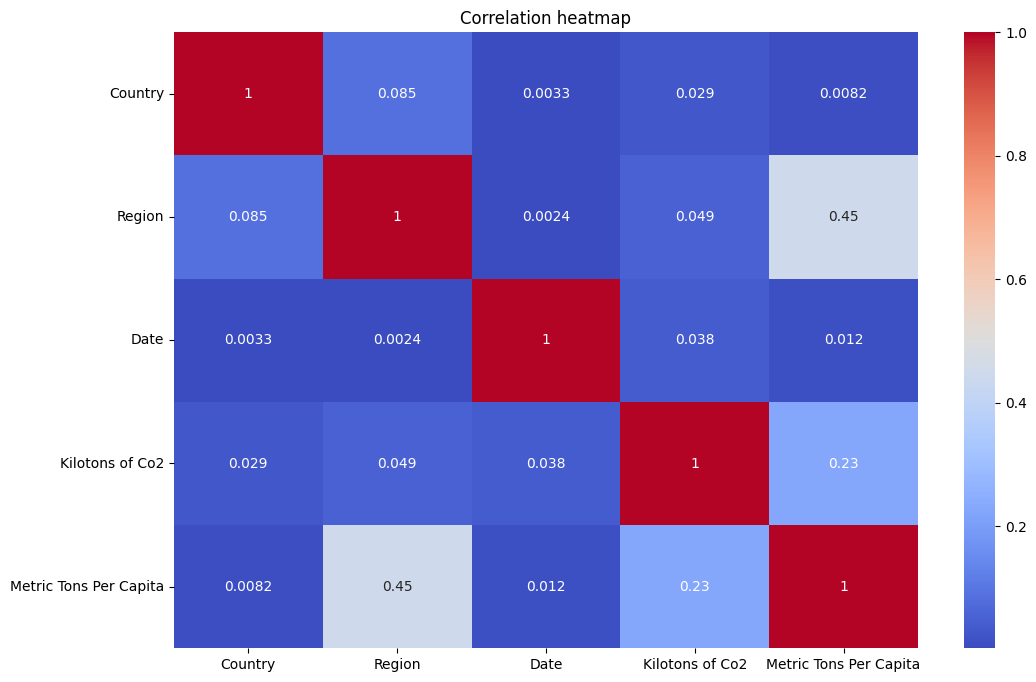

In [38]:
plt.figure(figsize=(12,8))  # Set the size of the figure
sns.heatmap(c,annot=True,cmap='coolwarm')# Create the heatmap with annotations
plt.title('Correlation heatmap')# Set the title of the heatmap
plt.show()

In [39]:
df.describe()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
count,5677.000000,5677.000000,5677,5.677000e+03,5677.000000
mean,94.331337,1.619165,2004-07-17 20:37:34.993834880,1.412292e+05,372.118549
min,0.000000,0.000000,1990-01-01 00:00:00,0.000000e+00,0.000000
25%,47.000000,0.000000,1997-01-01 00:00:00,1.380000e+03,56.000000
50%,94.000000,2.000000,2005-01-01 00:00:00,9.170000e+03,235.000000
75%,142.000000,3.000000,2012-01-01 00:00:00,5.848000e+04,621.000000
max,189.000000,4.000000,2019-01-01 00:00:00,1.070722e+07,1407.000000
std,54.845105,1.290492,NaN,6.491258e+05,372.681089


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [43]:
y=df['Kilotons of Co2']
x=df.drop(['Country','Region','Date','Metric Tons Per Capita'],axis=1)

In [44]:
print(x)

      Kilotons of Co2
0              8930.0
1              8080.0
2              7110.0
3              6080.0
4              6070.0
...               ...
5672           9770.0
5673           9760.0
5674           9600.0
5675           7750.0
5676           7600.0

[5677 rows x 1 columns]


In [45]:
print(y)

0       8930.0
1       8080.0
2       7110.0
3       6080.0
4       6070.0
         ...  
5672    9770.0
5673    9760.0
5674    9600.0
5675    7750.0
5676    7600.0
Name: Kilotons of Co2, Length: 5677, dtype: float64


In [46]:
scalar=StandardScaler()

In [47]:
scalar.fit(x)

StandardScaler()

In [48]:
standardized_data=scalar.transform(x)

In [49]:
print(standardized_data)

[[-0.20382923]
 [-0.2051388 ]
 [-0.20663325]
 ...
 [-0.20279699]
 [-0.20564722]
 [-0.20587832]]


In [50]:
print(y.unique())
print(y.unique().sum())

[8930. 8080. 7110. ... 9830. 9770. 9760.]
791033459.56


In [51]:
print(len(y.unique()))

3375


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3375)

In [53]:
model = LinearRegression() # y_train can be continuous for regression


In [54]:
#Fit the model to the training data
model.fit(x_train, y_train) # Added model fitting step

LinearRegression()

In [55]:
x_train_prediction = model.predict(x_train)# Predict on the training set

In [56]:
print(x_train_prediction)

[2.70000000e+02 1.73000000e+03 4.95606006e+06 ... 2.33900000e+05
 1.57152002e+06 9.60000000e+02]


In [57]:
x_train_accuracy = r2_score(y_train, x_train_prediction)

In [58]:
print(x_train_accuracy)

1.0


In [59]:
# prompt: give a testing data

# Sample testing data (replace with your actual testing data)
test_data = pd.DataFrame({
    'Kilotons of Co2': [10000, 20000, 30000],
})# Example values

# Preprocess the test data (same preprocessing steps as training data)
test_data['Kilotons of Co2'] = le.fit_transform(test_data['Kilotons of Co2'])

# Make predictions
predictions = model.predict(test_data)
predictions

array([8.73114914e-11, 1.00000000e+00, 2.00000000e+00])